#### Statistics for Everyone
# Introductory experiment

Or: How to know what you don't know 

In [1]:
# setup
from helpers.cards import *
import helpers.plotting as pt
from helpers.svg_wrapper import SVGImg
pt.enable_slide_theme()
pt.import_slide_theme_font_in_notebook()

## Introductory experiment: drawing cards from two stacks

<br>

- Imagine a game with **two big stacks of cards**.
- Like in a lottery, there are two types of cards: **wins** and **blanks** .
- The stacks were shuffled and don't contain equal numbers of wins and blanks.
- Each turn, draw one card from each stack.
- How many pairs of cards do you have to draw to decide **which stack has more wins**?

In [2]:
SVGImg('images/cards.svg', width='60%', output_dir='slides')

In [3]:
# create data for virtual experiments
p_win_1       = 0.5
p_win_2       = 0.38
n_card_pairs  = 100
n_repeats      = 50

df = repeated_experiments_df(
    p_win_1,
    p_win_2,
    n_card_pairs,
    n_repeats
)
df.head()

,experiment,stack,card_pair,win
0,1,1,1,1
1,1,1,2,1
2,1,1,3,0
3,1,1,4,0
4,1,1,5,1


In [4]:
# transparently export data if needed
# if you have issues viewing the plots, try embedding the data
# this will increase the file size!
data = pt.df_to_datasource(df)

The next three figures are interactive! Unfortunately they won't work on GitHub, in that case please keep on scrolling.

### Draw cards from two different stacks - one at a time from each stack

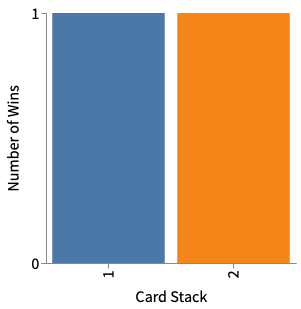

In [5]:
plot_first_experiment_bars(data=data, n_card_pairs=min(n_card_pairs, 40))

- What can we know after drawing a certain number of cards?
- When have we drawn enough cards to be certain?

.

.

**Spoilers below!**

.

.

.

Scroll down when you are finished drawing cards

.

.

.

.

.

.

.

.

.

.

.

.

.



### It can take a while to see which stack is better!

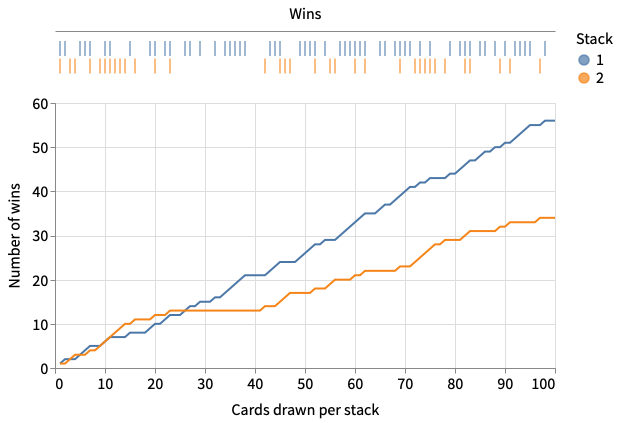

In [6]:
plot_first_experiment_lines(data=data)

### If we shuffle the cards and repeat the experiment,<br> will we get a different answer?

### Repeat the experiment
- Draw a fixed number of cards from each stack.
- Calculate each stack's winning probability = number of wins / number of cards.
- Shuffle the cards back into the stacks they came from.
- Repeat the experiment 50 times.

### Each repetition yields a different winning probability for each stack. 

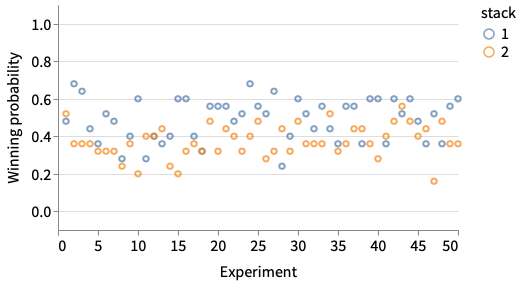

In [7]:
plot_repeated_experiments(data=data, n_card_pairs=n_card_pairs, show='Experiments')

- The more cards we draw per experiment, the more similar the outcomes (circles)<br> of the different experiments become.

### We can count how often the outcome falls in a certain range

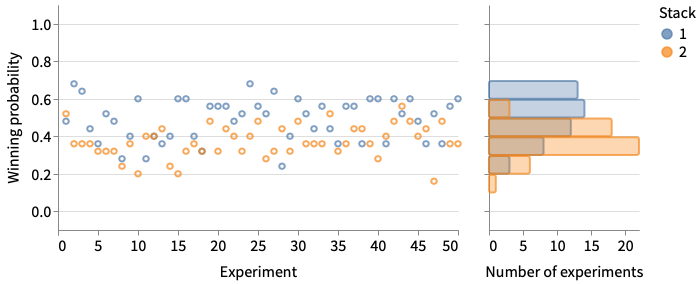

In [8]:
plot_repeated_experiments(data=data, n_card_pairs=n_card_pairs, show='Experiments, Histogram')

- A **histogram** shows how many experiments had a certain outcome (bar chart, right).
- It visualises the **distribution** of possible outcomes.

### The **standard deviation (std.)** measures the spread of the outcomes

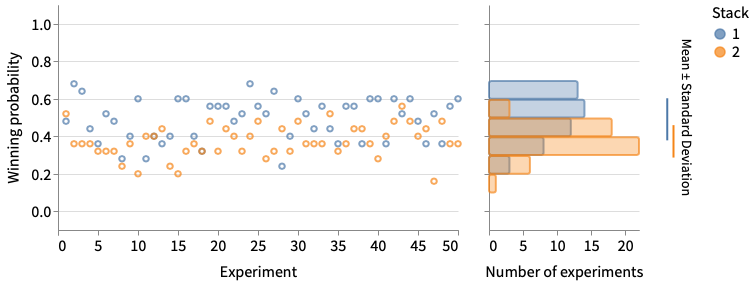

In [9]:
plot_repeated_experiments(data=data, n_card_pairs=n_card_pairs, show='Experiments, Histogram, Std')

- The standard deviation over many experiments corresponds to the **standard error** for a **single experiment**.$^{*▾}$
- **Two standard errors** correspond to the **confidence interval** which contains **95%** of the outcomes.
- That is, the uncertainty we'd have about the true winning probabilites after performing one experiment.

### *The standard error of the mean...

- ...is calculated by dividing the standard deviation<br>by the square root of the number of samples
- ...will be discussed further in a followup 

See also: https://en.wikipedia.org/wiki/Standard_error

### A single small experiment (15 cards)

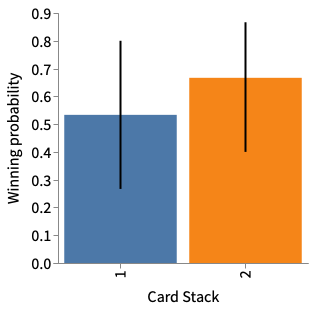

In [10]:
plot_experiment_bars_with_errors(data=data, n_card_pairs=n_card_pairs, n_card_pairs_init=15, n_repeats=n_repeats)

- **Error bars** show the uncertainty of a single experiment <br>(here the confidence interval).
- Here they **overlap** - the difference betwen the stacks is<br> smaller than the uncertainty
- **We can't decide** which stack is better $^{*▾}$

### *Error bars commonly represent confidence intervals or standard errors

For "well behaved" distributions, which we will explain in a followup,
- they show the **uncertainty of the mean** value of an observable,
- one standard error represent the range in which ~68% of the observations fall.
- 2 standard errors represent the range in which ~95% of the observations fall.
- If they **don't overlap**, we can assume the corresponding **means are different**.
- False positives can occur. To lower their probability, we can require more standard errors of difference.
- False negatives can occur. To lower their probability, we can collect more samples.
- Sometimes error bars can show other related measures, which should be noted near the figure.
- A detailed explanation can be found e.g. in this [paper by Cumming et. al.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2064100/)


### An bigger experiment (100 cards)

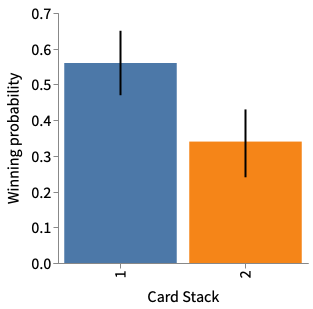

In [11]:
plot_experiment_bars_with_errors(data=data, n_card_pairs=n_card_pairs, n_card_pairs_init=100, n_repeats=n_repeats)

- The **error bars don't overlap**.
- We can say the difference is **statistically significant**.
- We can be very certain that stack 1 has more wins.

## Conclusion: observations have uncertainty

### Always ask about the uncertainty to…
- **avoid overconfidence**: you know what you don't know
- **avoid missing significant effects**: you know when you probably know something

## How to calculate these quantities yourself? 
See next section [practical basics](2_practical_basics.slides.html)!

In [12]:
# todo: think about links that work in both notebooks and slides